<a href="https://colab.research.google.com/github/shreeparab1890/Which-Bollywood-Celebrity-are-you/blob/main/which_celebrity_are_you.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install mtcnn==0.1.0
!pip install tensorflow==2.3.1
!pip install keras==2.4.3
!pip install keras-vggface==0.6
!pip install keras_applications==1.0.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
from tensorflow.keras.preprocessing import image
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
import numpy as np
import pickle
from tqdm import tqdm

In [85]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

In [50]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import pickle
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import cv2
from matplotlib import pyplot
from mtcnn import MTCNN
#keras.applications.resnet50.preprocess_input
#keras.applications.resnet50.ResNet50

In [16]:
!unzip "/content/Bollywood_celeb_face_localized.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Bollywood_celeb_face_localized/bollywood_celeb_faces_0/Ameesha_Patel/Ameesha_Patel.299.jpg  
  inflating: Bollywood_celeb_face_localized/bollywood_celeb_faces_0/Ameesha_Patel/Ameesha_Patel.31.jpg  
  inflating: Bollywood_celeb_face_localized/bollywood_celeb_faces_0/Ameesha_Patel/Ameesha_Patel.310.jpg  
  inflating: Bollywood_celeb_face_localized/bollywood_celeb_faces_0/Ameesha_Patel/Ameesha_Patel.317.jpg  
  inflating: Bollywood_celeb_face_localized/bollywood_celeb_faces_0/Ameesha_Patel/Ameesha_Patel.32.jpg  
  inflating: Bollywood_celeb_face_localized/bollywood_celeb_faces_0/Ameesha_Patel/Ameesha_Patel.33.jpg  
  inflating: Bollywood_celeb_face_localized/bollywood_celeb_faces_0/Ameesha_Patel/Ameesha_Patel.36.jpg  
  inflating: Bollywood_celeb_face_localized/bollywood_celeb_faces_0/Ameesha_Patel/Ameesha_Patel.37.jpg  
  inflating: Bollywood_celeb_face_localized/bollywood_celeb_faces_0/Ameesha_Patel/Ameesha_Patel.38.jpg  
 

In [17]:
import os
import pickle


fol_path = "/content/Bollywood_celeb_face_localized"
folders = os.listdir(fol_path)

filenames = []

for folder in folders:
    #print(folder)
    for actor in os.listdir(os.path.join(fol_path,folder)):
        for file in os.listdir(os.path.join(fol_path,folder,actor)):
            #print(file)
            filenames.append(os.path.join(fol_path,folder,actor,file))
            
        


In [19]:
len(filenames)

8664

In [20]:
pickle.dump(filenames,open('filenames.pkl','wb'))

In [35]:
from tensorflow import keras

In [69]:
model = keras.applications.resnet50.ResNet50(
    include_top=False,
    input_shape=(224,224,3),
    pooling='avg',
    weights='imagenet'
)

In [81]:
model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

In [67]:
#model.summary()

In [87]:
def feature_extractor(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img = np.expand_dims(img_array,axis=0)
    preprocessed_img = preprocess_input(expanded_img)

    result = model.predict(preprocessed_img).flatten()

    return result

In [88]:
features = []

for file in tqdm(filenames):
    features.append(feature_extractor(file,model))

100%|██████████| 8664/8664 [29:32<00:00,  4.89it/s]


In [89]:
pickle.dump(features,open('colab_embedding.pkl','wb'))

In [90]:
feature_list = np.array(pickle.load(open('/content/colab_embedding.pkl','rb')))
filenames = pickle.load(open('/content/filenames.pkl','rb'))

In [91]:
#model = keras.applications.resnet50.ResNet50(
#    include_top=False,
#    input_shape=(224,224,3),
#    pooling='avg',
#    weights='imagenet'
#)

In [92]:
model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

In [93]:
detector = MTCNN()

In [125]:
sample_img = cv2.imread('/salman_duplicate.jpg')
results = detector.detect_faces(sample_img)
x,y,width,height = results[0]['box']
print(x,y,width,height)
face = sample_img[y:y+height,x:x+width]

244 125 229 326


In [126]:
#  extract its features
image = Image.fromarray(face)
image = image.resize((224,224))

face_array = np.asarray(image)

face_array = face_array.astype('float32')

expanded_img = np.expand_dims(face_array,axis=0)
preprocessed_img = preprocess_input(expanded_img)
result = model.predict(preprocessed_img).flatten()
print(result)
print(result.shape)

[0.         3.4814358  0.12726407 ... 0.44182056 0.915863   1.9979813 ]
(2048,)


In [127]:
# find the cosine distance of current image with all the 8655 features
similarity = []
for i in range(len(feature_list)):
    similarity.append(cosine_similarity(result.reshape(1,-1),feature_list[i].reshape(1,-1))[0][0])

index_pos = sorted(list(enumerate(similarity)),reverse=True,key=lambda x:x[1])[0][0]
#print(index_pos)
predicted_img = cv2.imread(filenames[index_pos])


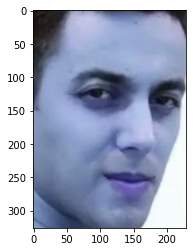

In [128]:
pyplot.imshow(face)
pyplot.show()

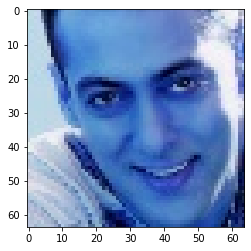

In [129]:
pyplot.imshow(predicted_img)
pyplot.show()

In [130]:
filenames[index_pos].split("/")[4]

'Salman_Khan'